In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np
from numpy.typing import NDArray

from my_functions import *
from my_filters import *


In [35]:
# if pwd is SRC  change to root
print("Current working directory: ", os.getcwd())
if os.path.basename(os.getcwd()) == "SRC":
    os.chdir("..")
print("Current working directory: ", os.getcwd())
print(os.path.basename(os.getcwd()))

Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Current working directory:  c:\Users\iWiss\Documents\GitHub\Stage_Signal_Physio
Stage_Signal_Physio


In [36]:
plt.close("all")  # close all figure windows
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['figure.figsize'] = [15, 5]  # Width x Height in inches
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.fontsize'] = 12  # Adjust the size (in points) as needed


In [37]:
# Define the xdf file of interest
xdf_input_filename = "001_MolLud_20201112_1_c.xdf"
#xdf_input_filename="020_DesMar_20211129_1_c.xdf"

xdf_input_filepath = os.path.normpath("DAT/INPUT/"+xdf_input_filename)

In [38]:
# definition of the EEG channels' names
channels_dict = {"Channel_1": "C4",
                 "Channel_2": "FC2",
                 "Channel_3": "FC6",
                 "Channel_4": "CP2",
                 "Channel_5": "C3",
                 "Channel_6": "FC1",
                 "Channel_7": "FC5",
                 "Channel_8": "CP1"}

# EEG

## Import EEG signals and shape data

In [39]:
EEG_data = retrieve_stream_data_from_xdf(xdf_input_filepath=xdf_input_filepath, stream_type="EEG")

EEG_timestamps = EEG_data["data"]["timestamps"] - EEG_data["data"]["timestamps"][0]
EEG_srate = EEG_data["infos"]["sample_rate"]["effective"]
EEG_units = np.unique(EEG_data["infos"]["channels"]["units"])[0]

Accessing stream: 
Type: 'EEG' | Name: 'LSLOutletStreamName-EEG'


## Import event markers and format data

In [40]:
mouse_marker_times_labels = create_marker_times_labels_array2(xdf_input_filepath=xdf_input_filepath)
nearest_markers_array = nearest_timestamps_array_finder(signal_times_stamps=EEG_timestamps, markers=mouse_marker_times_labels)

# make times start in reference to the first EEG timestamp instead of unix epoch.
mouse_marker_times_labels[:, 0] -= EEG_data["data"]["timestamps"][0]

Accessing stream: 
Type: 'Markers' | Name: 'MouseToNIC'
MARKERS LEN: 12


In [41]:
channel_num=5
channel_index=channel_num-1
channel_num_name=f"Channel_{channel_num}"
channel_name=channels_dict[channel_num_name]

## Plot one Raw EEG signal

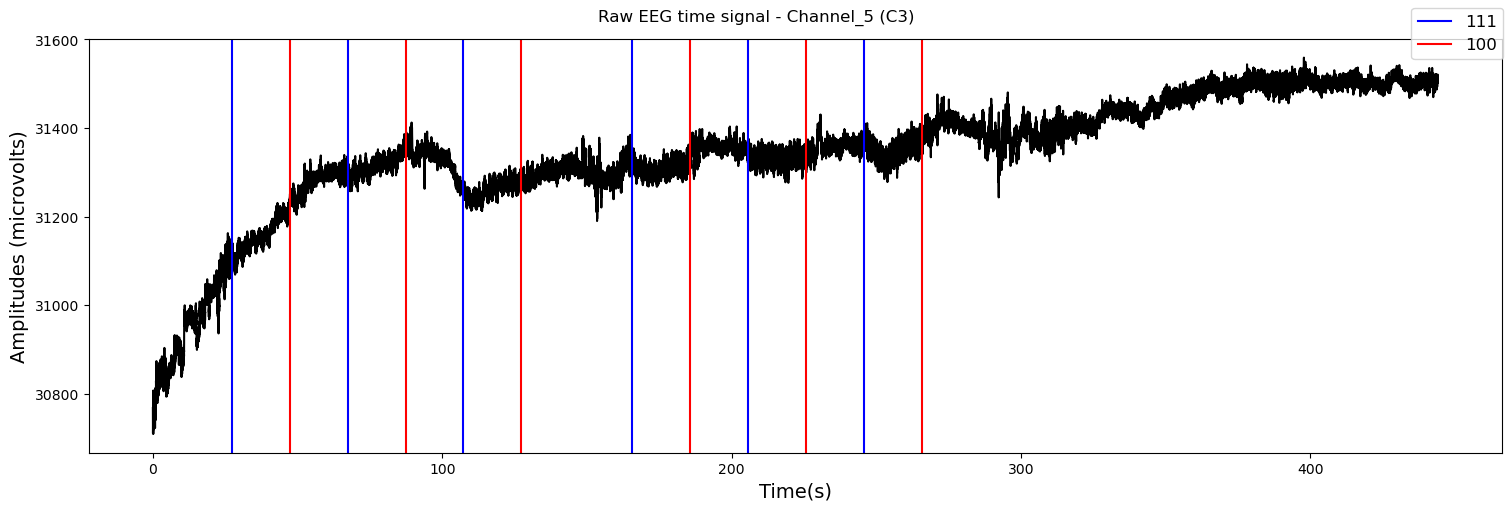

In [42]:
figure,axis=plt.subplots()
figure.suptitle(f"Raw EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_data["data"]["time_series"][:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()


## Detrend EEG signals and show result

input_signals shape:
 (221938, 8)
input_signals mean per signal:
 [27897.195 26144.139 28026.402 35319.527 31324.672 24827.713 32372.799
 29788.95 ]


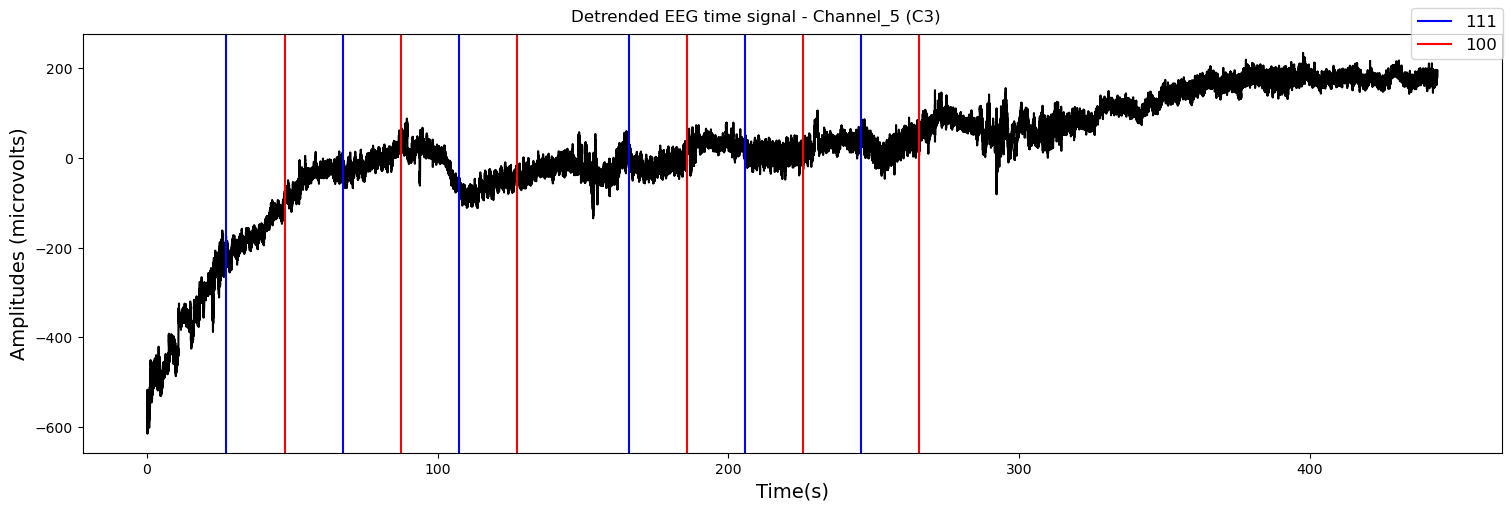

In [43]:
EEG_amplitudes_centered = detrend_signals(EEG_data["data"]["time_series"])

figure,axis=plt.subplots()
figure.suptitle(f"Detrended EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_amplitudes_centered[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()


## Rereference EEG signals to average and show result on one signal

input_signals shape:(221938, 8)
input_signals whole mean:13.818697929382324
mean_vector shape: ()


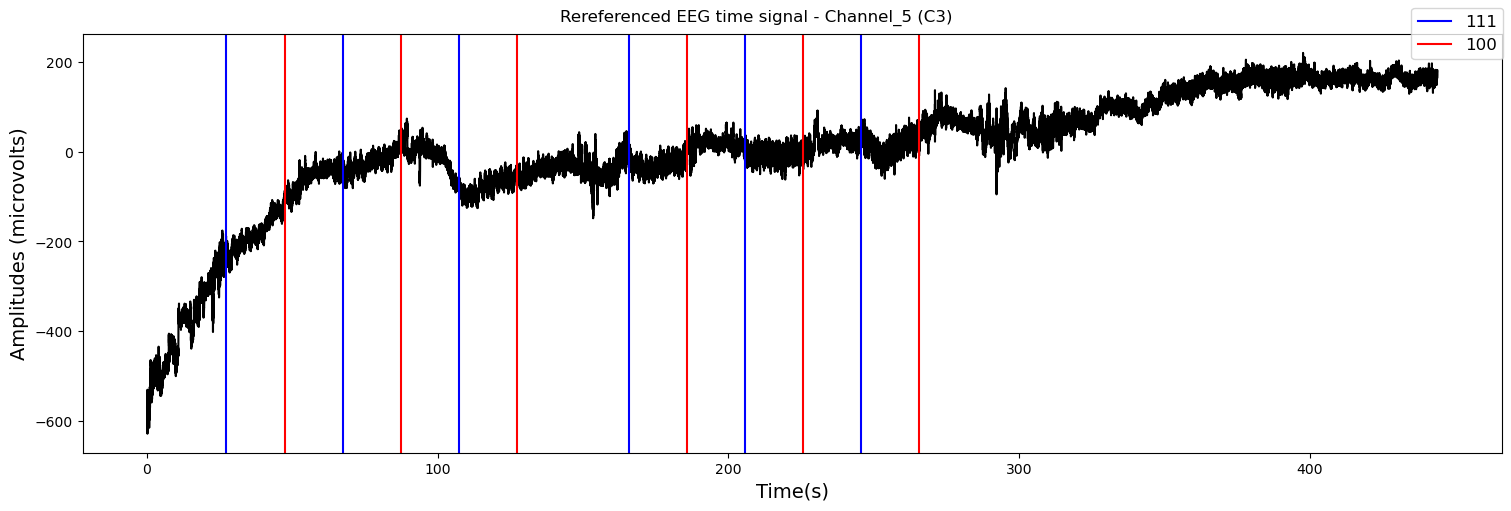

In [44]:
EEG_amplitudes_rereferenced = rereference_signals(input_signals=EEG_amplitudes_centered)

figure,axis=plt.subplots()
figure.suptitle(f"Rereferenced EEG time signal - {channel_num_name} ({channel_name})")
axis.plot(EEG_timestamps,EEG_amplitudes_rereferenced[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Filter EEG signals Notch (50Hz) and BP(3-100Hz) and show result on one signal

LOW_CUTOFF_FREQ_THEORETICAL=3,HIGH_CU-TOFF_FREQ_THEORETICAL=100
LOW_CUTOFF_FREQ_CORRECTED=2.839,HIGH_CUTOFF_FREQ_CORRECTED=104.203
NOTCH_CUTOFF_FREQ=50
Filtered signal shape: (221938, 8)


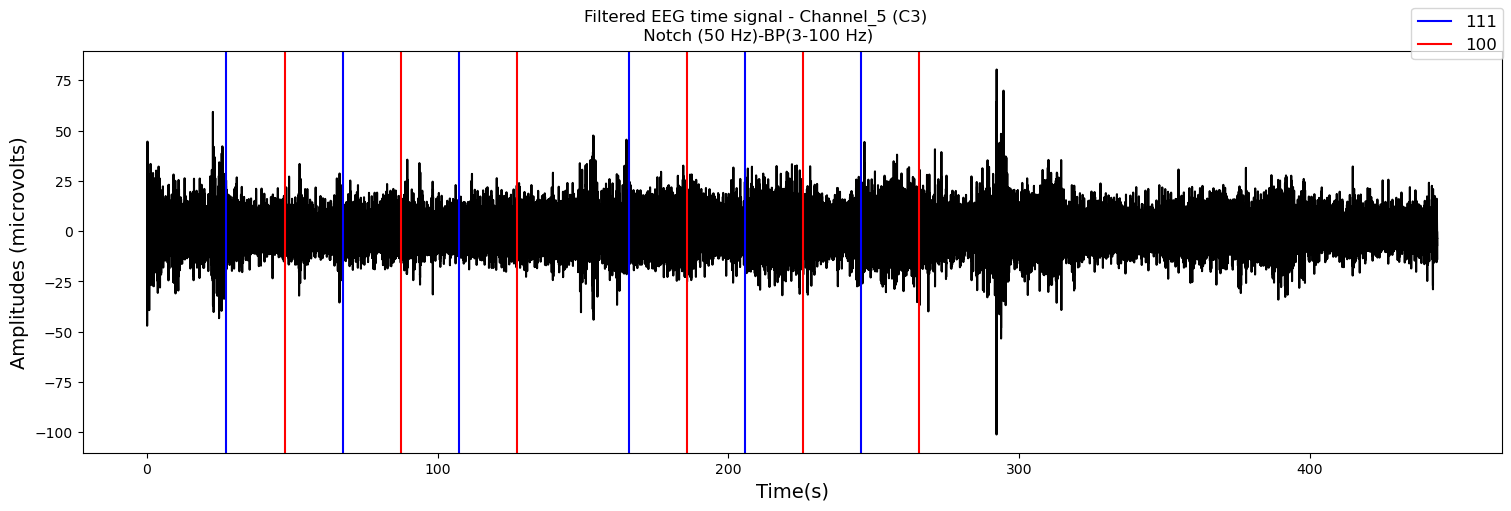

In [45]:
EEG_amplitudes_centered_filtered, filt_freqs, filt_response = filter_signal(input_signals=EEG_amplitudes_rereferenced, sample_rate=EEG_srate, order=8, cutofffreq=(3, 100, 50))

figure,axis=plt.subplots()
figure.suptitle(f"Filtered EEG time signal - {channel_num_name} ({channel_name})\n Notch (50 Hz)-BP(3-100 Hz)")
axis.plot(EEG_timestamps,EEG_amplitudes_centered_filtered[:,channel_index],color="black")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Epoch EEG signals and show result on one signal

In [46]:
epoch_limits = (0, 4)
epoch_num=6
epoch_index=epoch_num-1
    
nearest_markers_array = nearest_timestamps_array_finder(
    signal_times_stamps=EEG_timestamps, markers=mouse_marker_times_labels)

MARKERS LEN: 12


221938
Epoch limits relative to events (in sec): start: 0s - end: 4s
Epoch limits relative to events (in samples): n_points_before_marker: 0.0 - n_points_after_marker: 1999.990908174066
Event type : 111 ------------ epochs :
first_seg_coord: 13659 - second_seg_coord: 15658
first_seg_coord: 33660 - second_seg_coord: 35659
first_seg_coord: 53662 - second_seg_coord: 55661
first_seg_coord: 82834 - second_seg_coord: 84833
first_seg_coord: 102836 - second_seg_coord: 104835
first_seg_coord: 122837 - second_seg_coord: 124836
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
Event type : 100 ------------ epochs :
first_seg_coord: 23660 - second_seg_coord: 25659
first_seg_coord: 43661 - second_seg_coord: 45660
first_seg_coord: 63663 - second_seg_coord: 65662
first_seg_coord: 92835 - second_seg_coord: 94834
first_seg_coord: 112837 - second_seg_coord: 114836
first_seg_coord: 132838 - second_seg_coord: 134837
signal_segments shape: (2000, 6)
time_segments shape: (2000, 6)
221938
Epoch

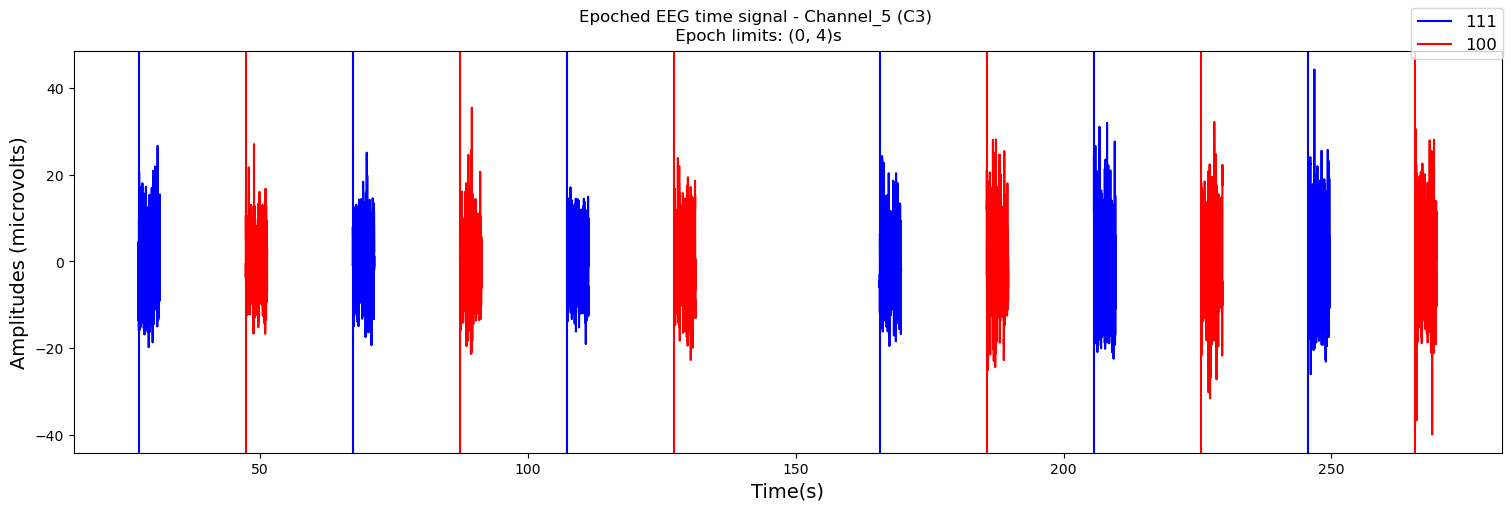

In [47]:
EEG_signals_epoched = extract_data_epochs_from_all_signals(signals=EEG_amplitudes_centered_filtered,sample_rate=EEG_srate,
                                                           markers_labels_times=nearest_markers_array,select_events=(111, 100),
                                                           epoch_limits=epoch_limits)
                                                                                 
figure,axis=plt.subplots()
figure.suptitle(f"Epoched EEG time signal - {channel_num_name} ({channel_name})\n Epoch limits: {epoch_limits}s")
axis.plot(EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
          EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],color="blue")
axis.plot(EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
          EEG_signals_epoched[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],color="red")
axis.set_xlabel("Time(s)")
axis.set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Compute PSD of epoched EEG signals and show results on one signal for two successive events

segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
segments shapes to psd - (2000, 6)
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221938
nfft: 221

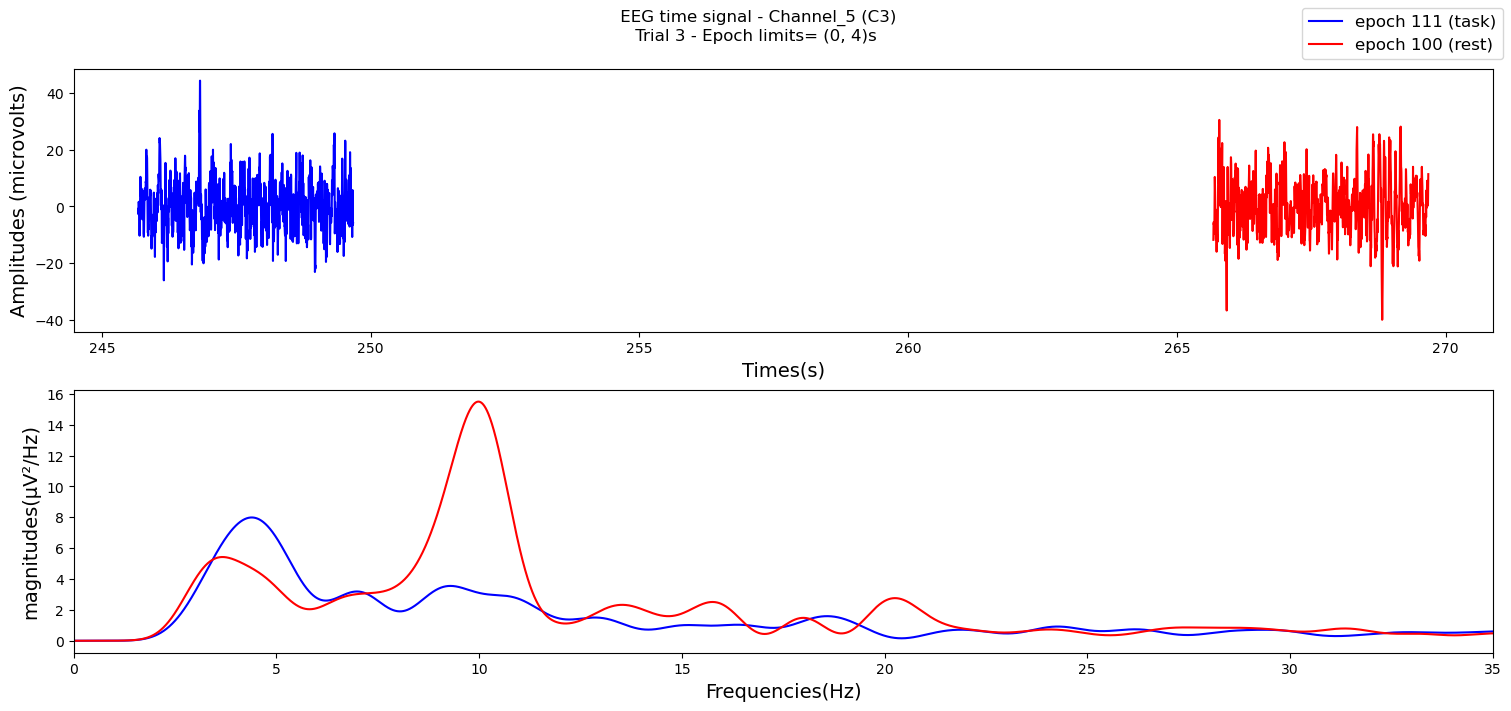

In [48]:
EEG_signals_epochs_psds = compute_psds_for_each_epoch_all_signals(input_dict=EEG_signals_epoched, sample_rate=EEG_srate, nfft=len(EEG_amplitudes_centered_filtered))

figure,axis=plt.subplots(2,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"][:,epoch_index],color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,epoch_index],color="red",label="epoch 100 (rest)")   

axis[1].set_xlabel("Frequencies(Hz)")
axis[1].set_ylabel("magnitudes(µV²/Hz)")
axis[1].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,epoch_index],color="blue")
axis[1].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,epoch_index],color="red")
axis[1].set_xlim(0,35)

#show_markers2(plot_type=axis,markers_times_array=mouse_marker_times_labels)
figure.legend()

## Compute ERSP of all epochs of all EEG signals and show results on one signal for two successive events

In [49]:
rest_psd=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"]
task_psd=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"]
frequencies=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index]
print(np.unique(rest_psd==task_psd))
print(np.shape(frequencies))

ERSP=compute_ERSPs_via_events_psds(reference_PSDs=rest_psd,event_PSDs=task_psd)
mean_ersp=np.mean(ERSP[:,4:7],axis=1)

[False]
(110970,)


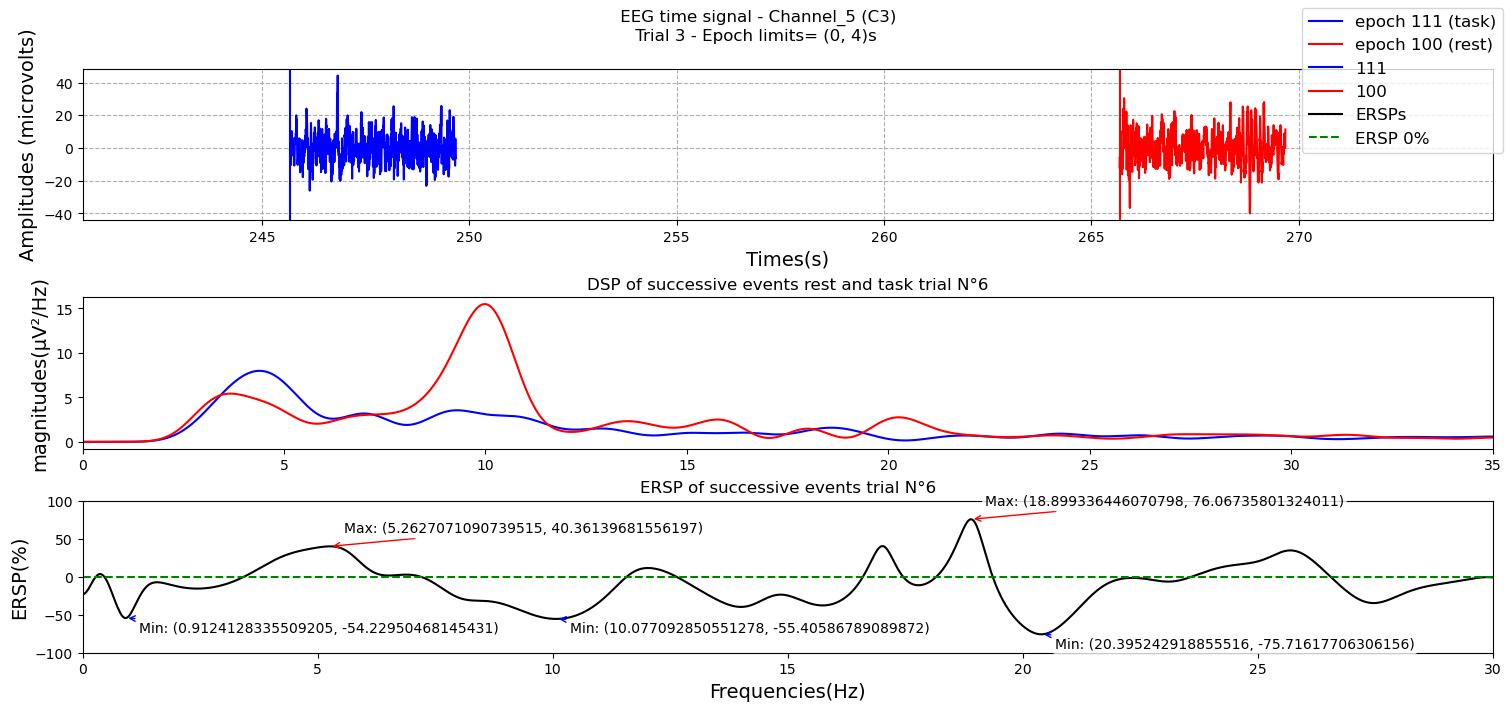

In [50]:
figure,axis=plt.subplots(3,figsize=(15,7),layout="constrained")
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"][:,epoch_index],color="blue",label="epoch 111 (task)")
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"][:,epoch_index],color="red",label="epoch 100 (rest)")   
axis[0].set_xlim(np.min(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"][:,epoch_index])-5,
                 np.max(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"][:,epoch_index])+5)
axis[0].grid(which="both", axis="both", linestyle="--")

show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)

axis[1].set_title(f"DSP of successive events rest and task trial N°{epoch_num}")
axis[1].set_ylabel("magnitudes(µV²/Hz)")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,epoch_index],color="blue")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,epoch_index],color="red")
axis[1].set_xlim(0,35)

axis[2].set_title(f"ERSP of successive events trial N°{epoch_num}")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_frequencies"][:,epoch_index],
             ERSP[:,epoch_index],color="black",label="ERSPs")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)

annotate_local_extrema(axis=axis[2],x=EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_frequencies"][:,epoch_index],
                       y=ERSP[:,epoch_index],order=3000)



figure.legend()

## Show the PSD of all epochs of one signal and averaged ERSPs over each block

In [51]:
#average DSPs on blocks
mean_psd_block1_111=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,0:3],axis=1)
mean_psd_block1_100=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,0:3],axis=1)

mean_psd_block2_111=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,3:7],axis=1)
mean_psd_block2_100=np.mean(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,3:7],axis=1)

#average ERSPs on blocks
mean_ersp_block1=np.mean(ERSP[:,0:3],axis=1)
print(np.shape(mean_ersp_block1))
mean_ersp_block2=np.mean(ERSP[:,3:7],axis=1)

(110970,)


(110970,)
(110970,)


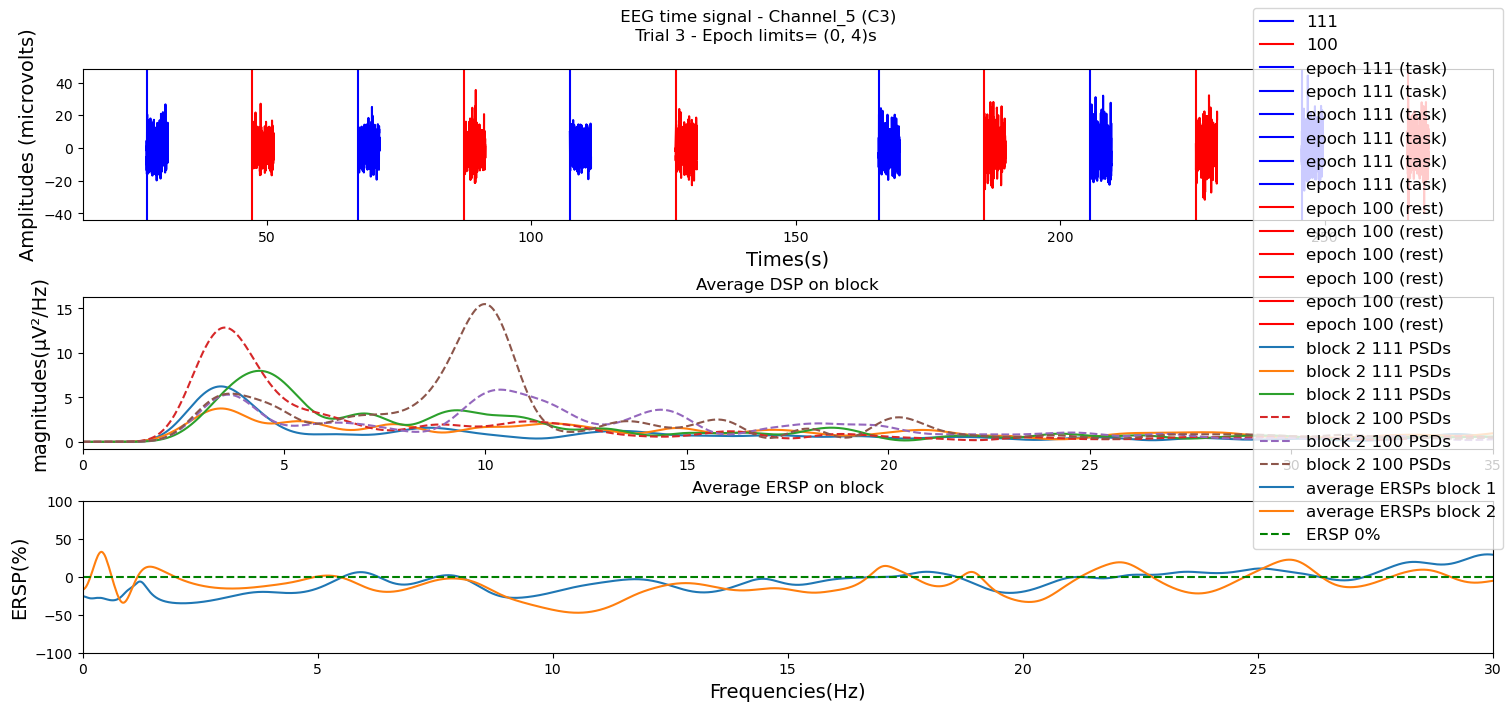

In [52]:
print(np.shape(mean_psd_block1_111))
print(np.shape(mean_psd_block1_100))
figure,axis=plt.subplots(3,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],
             color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],
             color="red",label="epoch 100 (rest)")   

axis[1].set_title(f"Average DSP on block")
axis[1].set_ylabel("magnitudes(µV²/Hz)")


axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_111"]["PSD_magnitudes"][:,3:7],label="block 2 111 PSDs")
axis[1].plot(frequencies,EEG_signals_epochs_psds[channel_num_name]["Epochs"]["PSDs"]["label_100"]["PSD_magnitudes"][:,3:7],label="block 2 100 PSDs",linestyle="--")
axis[1].set_xlim(0,35)

axis[2].set_title(f"Average ERSP on block")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(frequencies,mean_ersp_block1,label="average ERSPs block 1")
axis[2].plot(frequencies,mean_ersp_block2,label="average ERSPs block 2")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)
figure.legend()


## Show averaged PSD of all epochs of one signal and averaged ERSPs over block 2 (right arm sollicitation)

(110970,)
(110970,)


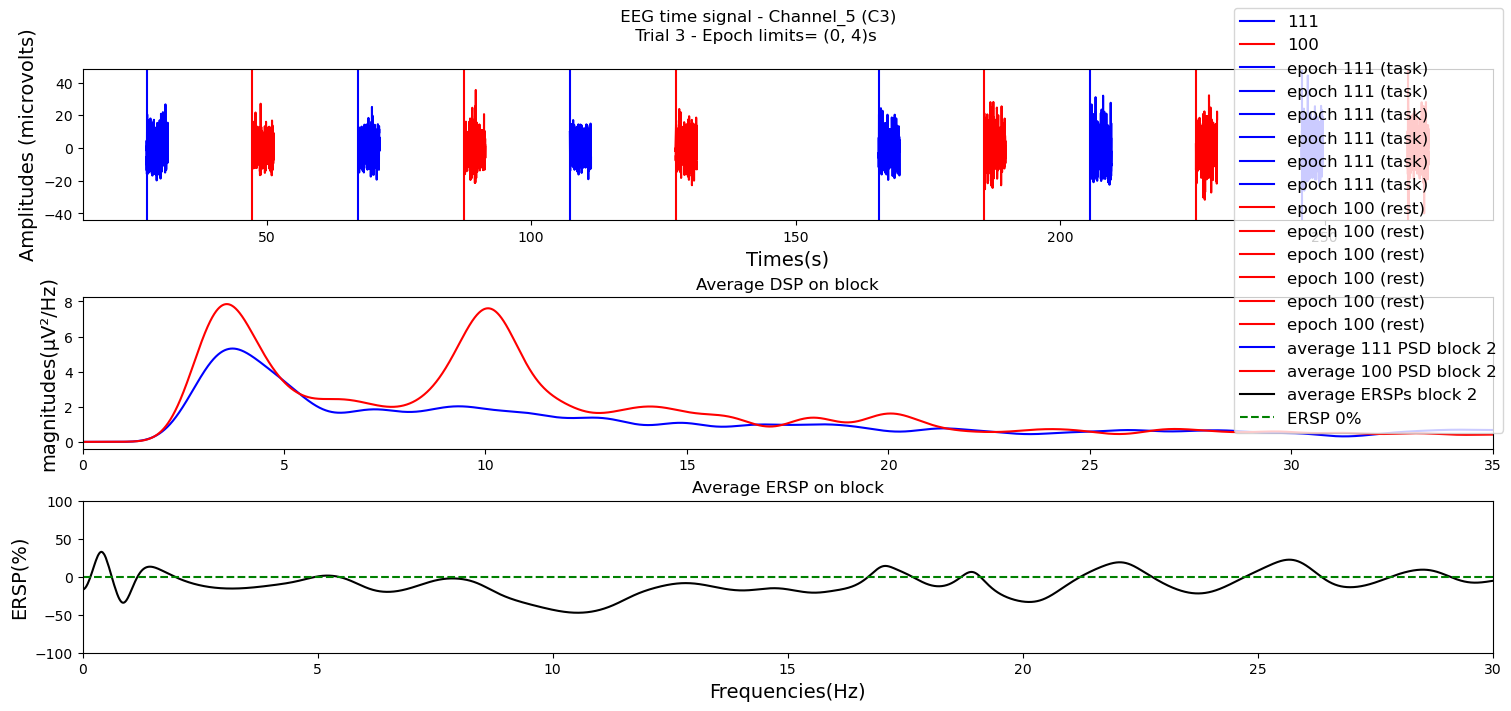

In [53]:
print(np.shape(mean_psd_block1_111))
print(np.shape(mean_psd_block1_100))
figure,axis=plt.subplots(3,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)
axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],
             color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
             EEG_signals_epochs_psds[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],
             color="red",label="epoch 100 (rest)")   

axis[1].set_title(f"Average DSP on block")
axis[1].set_ylabel("magnitudes(µV²/Hz)")


axis[1].plot(frequencies,mean_psd_block2_111,color="blue",label="average 111 PSD block 2")
axis[1].plot(frequencies,mean_psd_block2_100,color="red",label="average 100 PSD block 2")
axis[1].set_xlim(0,35)

axis[2].set_title(f"Average ERSP on block")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(frequencies,mean_ersp_block2,color="black",label="average ERSPs block 2")
axis[2].axhline(y = 0, color = 'green', linestyle = '--',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)
figure.legend()


## Alternative method to compute ERSPs on one time window for all electrodes simultaneously

In [54]:
EEG_signals_epochs_psds_ersps=compute_successive_epochs_ERSPs_for_all_signals(input_dict=EEG_signals_epochs_psds,event_labels=("label_100","label_111"))
EEG_signals_epochs_psds_ersps["Channel_1"]["Epochs"]["PSDs"]["label_100"]['PSD_frequencies']
EEG_signals_epochs_psds_ersps["Channel_1"]["Epochs"]["ERSPs"]["ERSP_frequencies"]
EEG_signals_epochs_psds_ersps["Channel_1"]["Epochs"]["ERSPs"]["ERSP_magnitudes"]

Event labels found: 
-Reference period label set to: label_100
-Event period label set to: label_111


array([[ -2.33950515, -28.62535729, -25.39961534, -34.78278185,
        -22.8900399 , -48.51207218],
       [ -2.19807062, -28.95656391, -25.33516684, -34.73699931,
        -22.74413635, -48.3493927 ],
       [ -2.33950515, -28.95656391, -25.33516684, -34.73699931,
        -22.74413635, -48.3493927 ],
       ...,
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

(110970,)
(110970,)


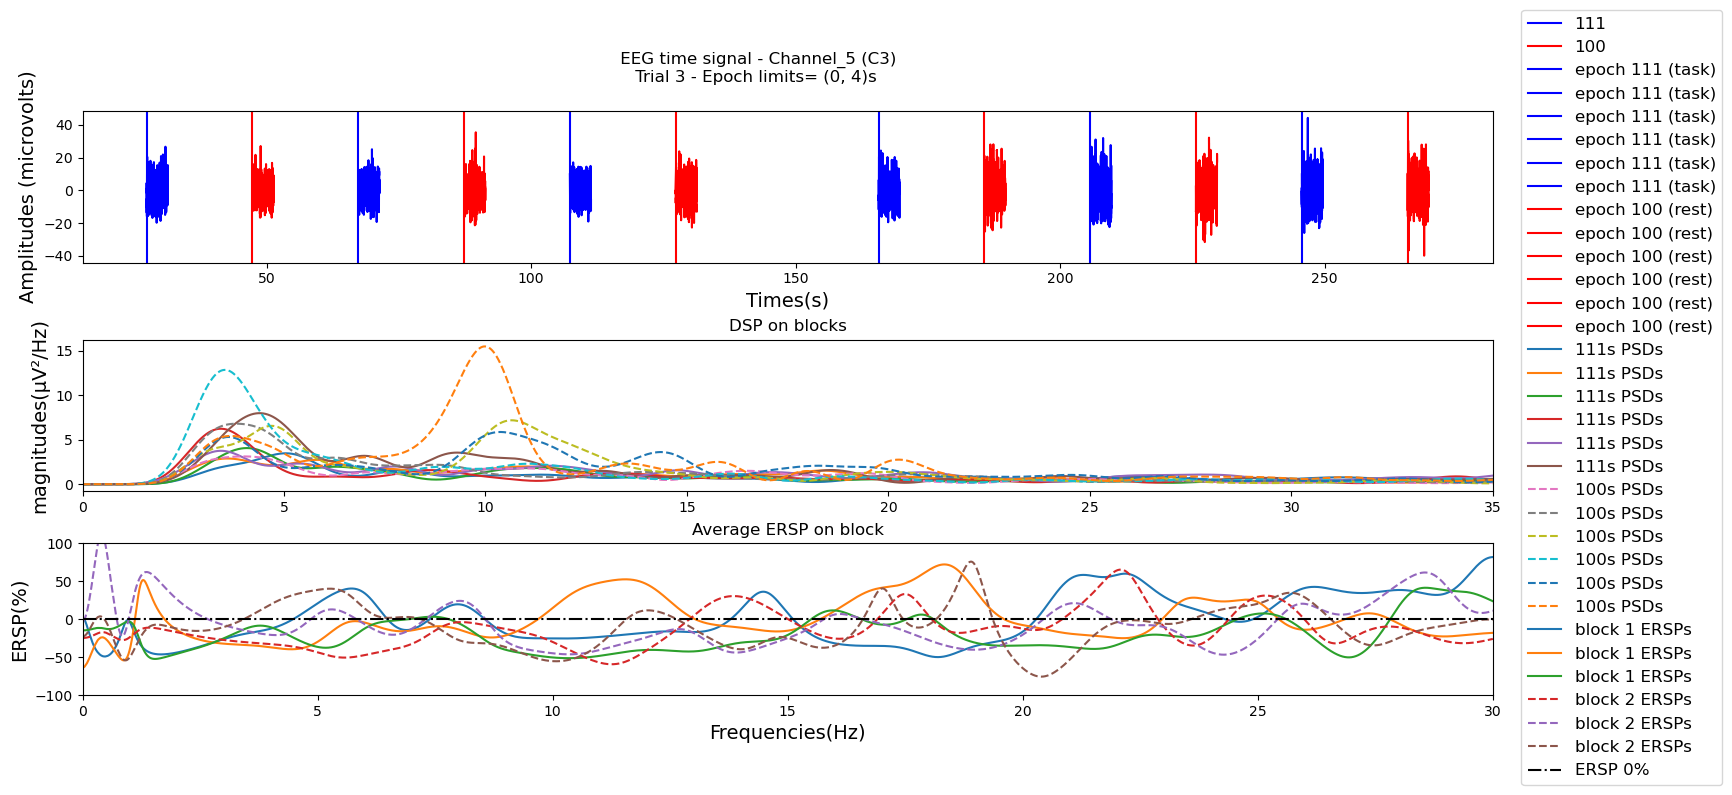

In [55]:
print(np.shape(mean_psd_block1_111))
print(np.shape(mean_psd_block1_100))
figure,axis=plt.subplots(3,figsize=(15,7))
figure.suptitle(f" EEG time signal - {channel_num_name} ({channel_name})\n Trial 3 - Epoch limits= {epoch_limits}s \n")

axis[0].set_xlabel("Times(s)")
axis[0].set_ylabel(f"Amplitudes ({EEG_units})")
show_markers2(plot_type=axis[0],markers_times_array=mouse_marker_times_labels)
axis[0].plot(EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["time_signals"]["label_111"]["time_segments"],
             EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["time_signals"]["label_111"]["signal_segments"],
             color="blue",label="epoch 111 (task)")

axis[0].plot(EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["time_signals"]["label_100"]["time_segments"],
             EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["time_signals"]["label_100"]["signal_segments"],
             color="red",label="epoch 100 (rest)")   

axis[1].set_title(f"DSP on blocks")
axis[1].set_ylabel("magnitudes(µV²/Hz)")

axis[1].plot(frequencies,EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["PSDs"]["label_111"]['PSD_magnitudes'],label="111s PSDs")
axis[1].plot(frequencies,EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["PSDs"]["label_100"]['PSD_magnitudes'],linestyle="--",label="100s PSDs")
axis[1].set_xlim(0,35)

axis[2].set_title(f"Average ERSP on block")
axis[2].set_xlabel("Frequencies(Hz)")
axis[2].set_ylabel("ERSP(%)")
axis[2].plot(frequencies,EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["ERSPs"]["ERSP_magnitudes"][:,0:3],label="block 1 ERSPs")
axis[2].plot(frequencies,EEG_signals_epochs_psds_ersps[channel_num_name]["Epochs"]["ERSPs"]["ERSP_magnitudes"][:,3:7],linestyle="--",label="block 2 ERSPs")

axis[2].axhline(y = 0, color = 'black', linestyle = '-.',label="ERSP 0% ")
axis[2].set_xlim(0,30)
axis[2].set_ylim(-100,100)
figure.legend(bbox_to_anchor = (1.15, 0.5), loc='center right')


In [56]:
#OOK
def time_frequency_ERSPs_all_signals(signals,sample_rate:Any,markers_labels_times,select_events:Tuple[Any,Any],epoch_limits:Tuple[float,float,float]):
    
    start,stop,step=epoch_limits
    time_vector=np.arange(start,stop+step,step)
    #time_bins=zip(time_vector[::2], time_vector[1::2])
    successive_time_bins = zip(time_vector[:-1], time_vector[1:])

    time_frequency_ersps_dict={}

    for time_bin in successive_time_bins:
        print(time_bin)

        EEG_signals_epoched = extract_data_epochs_from_all_signals(signals=signals,sample_rate=sample_rate,
                                                                markers_labels_times=markers_labels_times,select_events=select_events,
                                                                epoch_limits=time_bin)
        EEG_signals_epochs_psds = compute_psds_for_each_epoch_all_signals(input_dict=EEG_signals_epoched, sample_rate=sample_rate, nfft=len(signals)/8)

        #EEG_signals_epochs_psds = compute_psds_for_each_epoch_all_signals(input_dict=EEG_signals_epoched, sample_rate=sample_rate)

        EEG_signals_epochs_psds_ersps=compute_successive_epochs_ERSPs_for_all_signals(input_dict=EEG_signals_epochs_psds,event_labels=("label_100","label_111"))

        time_frequency_ersps_dict[str(time_bin)]=EEG_signals_epochs_psds_ersps
    
    return time_frequency_ersps_dict

In [57]:
epoch_param=(-5,5,1)
ersps_timecourses=time_frequency_ERSPs_all_signals(signals=EEG_amplitudes_centered_filtered,sample_rate=EEG_srate,
                                 markers_labels_times=nearest_markers_array,
                                 select_events=(111, 100),epoch_limits=epoch_param)



(-5, -4)
221938
Epoch limits relative to events (in sec): start: -5s - end: -4s
Epoch limits relative to events (in samples): n_points_before_marker: -2499.988635217582 - n_points_after_marker: -1999.990908174066
Event type : 111 ------------ epochs :
first_seg_coord: 11159 - second_seg_coord: 11659
first_seg_coord: 31160 - second_seg_coord: 31660
first_seg_coord: 51162 - second_seg_coord: 51662
first_seg_coord: 80334 - second_seg_coord: 80834
first_seg_coord: 100336 - second_seg_coord: 100836
first_seg_coord: 120337 - second_seg_coord: 120837
signal_segments shape: (501, 6)
time_segments shape: (501, 6)
Event type : 100 ------------ epochs :
first_seg_coord: 21160 - second_seg_coord: 21660
first_seg_coord: 41161 - second_seg_coord: 41661
first_seg_coord: 61163 - second_seg_coord: 61663
first_seg_coord: 90335 - second_seg_coord: 90835
first_seg_coord: 110337 - second_seg_coord: 110837
first_seg_coord: 130338 - second_seg_coord: 130838
signal_segments shape: (501, 6)
time_segments shape

In [58]:
print(ersps_timecourses.keys())

dict_keys(['(-5, -4)', '(-4, -3)', '(-3, -2)', '(-2, -1)', '(-1, 0)', '(0, 1)', '(1, 2)', '(2, 3)', '(3, 4)', '(4, 5)'])


In [59]:
#epoch_limits
print(ersps_timecourses.keys())
wiss=ersps_timecourses["(0, 1)"]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_magnitudes"]

print(type(wiss),wiss.shape)
wiss2=ersps_timecourses["(0, 1)"]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_frequencies"]
freqswiss=ersps_timecourses["(0, 1)"]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_frequencies"]

dict_keys(['(-5, -4)', '(-4, -3)', '(-3, -2)', '(-2, -1)', '(-1, 0)', '(0, 1)', '(1, 2)', '(2, 3)', '(3, 4)', '(4, 5)'])
<class 'numpy.ndarray'> (13872, 6)


In [60]:
#OOK

#converti dictionnaire (time window>) en array 4d et en liste d'array 3d (fréquences,channel,fenetretemporelle)
listos2=[]
for time_bin in ersps_timecourses.keys():
    listos1=[]
    for channel in ersps_timecourses[time_bin].keys():
        a=ersps_timecourses[time_bin][channel]["Epochs"]["ERSPs"]["ERSP_magnitudes"]
        listos1.append(a)
    array2d=np.stack(listos1,axis=1)
    listos2.append(array2d)

#array_4d(frequences,channel,fenetrestemporelles,essai)
array_4d=np.stack(listos2,axis=2)

#afinal_4d_array(frequences,fenetrestemporelles,channel,essai)
final_4d_array=np.transpose(array_4d,(0,2,1,3))

# Break down the 4D array into a list of 3D arrays
array_3d_list = [array_4d[:, :, :, i] for i in range(array_4d.shape[3])]
# transpose the 3d arrays to have shape matching plt.imshow expected format

list_of_transposed_arrays = [np.transpose(array, (0, 2, 1)) for array in array_3d_list]


In [67]:
print("array_4d",array_4d.shape)
print("final_4d_array",final_4d_array.shape)

print("nombre d'essais",len(array_3d_list))
print("dimensions array3d",array_3d_list[0].shape)
print("f",list_of_transposed_arrays[0].shape)


array_4d (13872, 8, 10, 6)
final_4d_array (13872, 10, 8, 6)
nombre d'essais 6
dimensions array3d (13872, 8, 10)
f (13872, 10, 8)


In [62]:
u=ersps_timecourses["(0, 1)"]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_magnitudes"][:,1]
#position liste = evenement/essais
#3darray des ERSP(frequences,channel_number,time_bin)
v=array_3d_list[0][:,0,5]
np.unique(u==v)

x=list_of_transposed_arrays[1][:,5,0]
np.unique(x==u)


array([ True])

In [63]:
"""liste=[]
for time_bin in list(ersps_timecourses.keys()):
    print(time_bin,type(time_bin))
    wiss=ersps_timecourses[time_bin]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_magnitudes"][:,2]
    liste.append(wiss)

arr3d=np.stack(liste)
eren=np.transpose(arr3d)
print(np.shape(arr3d))
print(np.shape(eren))"""



'liste=[]\nfor time_bin in list(ersps_timecourses.keys()):\n    print(time_bin,type(time_bin))\n    wiss=ersps_timecourses[time_bin]["Channel_1"]["Epochs"]["ERSPs"]["ERSP_magnitudes"][:,2]\n    liste.append(wiss)\n\narr3d=np.stack(liste)\neren=np.transpose(arr3d)\nprint(np.shape(arr3d))\nprint(np.shape(eren))'

(13872, 6)


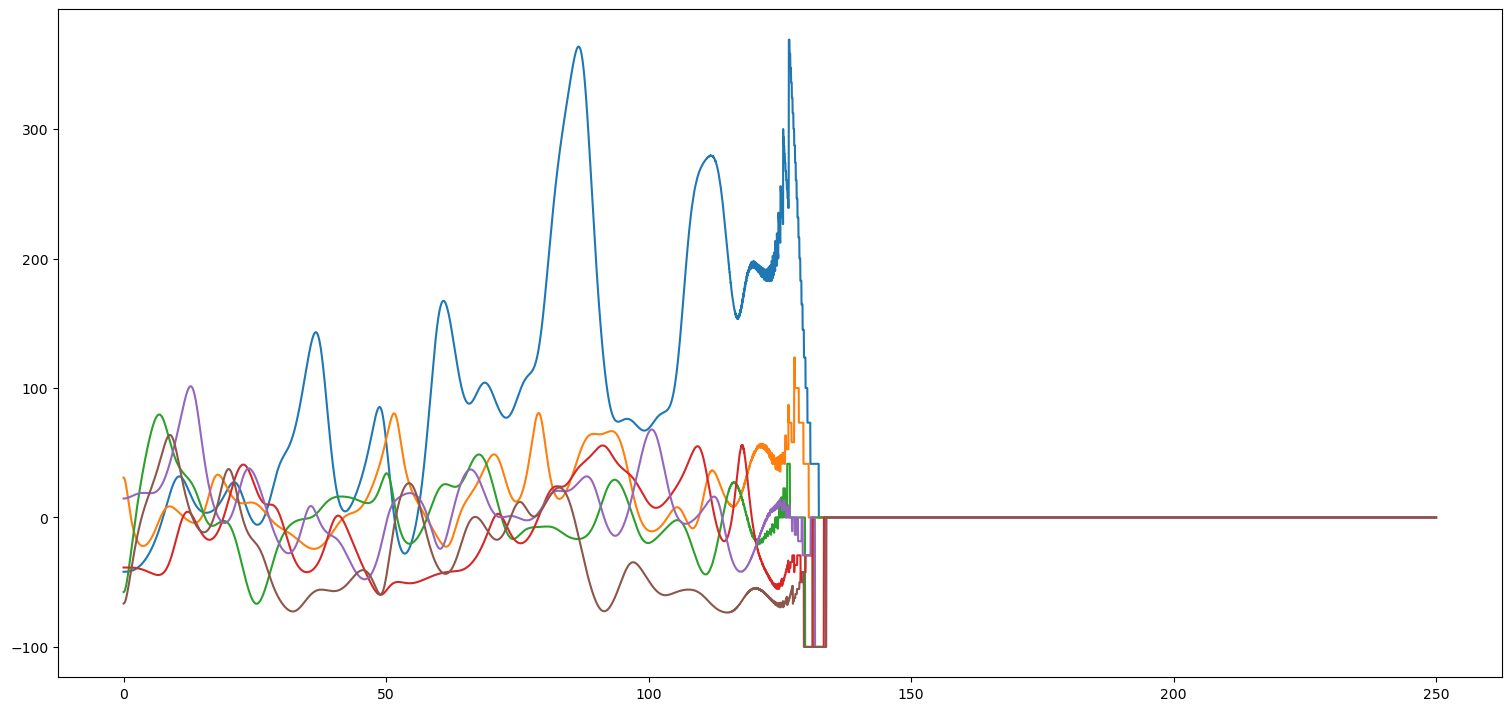

In [64]:
print(np.shape(wiss))
figure,axis=plt.subplots(figsize=(15,7),layout="constrained")
axis.plot(wiss2,wiss)
#axis.set_xlim(0,30)

In [65]:
print(freqswiss[0])
print(freqswiss[-1])

0.0
249.99886352175827


In [66]:
#V2
from matplotlib.ticker import AutoMinorLocator

for trial in range(len(list_of_transposed_arrays)):
    print("trial num",trial)
    # Create the time-frequency plot
    plt.figure(figsize=(13, 6))

    # Use extent to specify the data limits for the axes
    """plt.imshow(eren,extent=(-6,6,freqswiss[0],freqswiss[-1]),
            aspect='auto', cmap='viridis', origin='lower')"""
    plt.imshow(list_of_transposed_arrays[trial][:,:,0],extent=(epoch_param[0],epoch_param[1],freqswiss[0],freqswiss[-1]),vmin=np.min(eren),vmax=np.max(eren),
            aspect='auto', cmap='jet', origin='lower')
    plt.ylim(0,100)
    plt.xlim(epoch_param[0],epoch_param[1])

    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    plt.grid(visible=True,which="both",axis="both",linestyle="dashed")
    plt.colorbar(label='ERSP Magnitude (%)')
    plt.title(f'Time-Frequency Plot of ERSPs\n {xdf_input_filename} - Electrode C4 \n trial 3 block 1')
    plt.xlabel('Times (s)')
    plt.ylabel('Frequency Bins')

trial num 0


NameError: name 'eren' is not defined

<Figure size 1300x600 with 0 Axes>

trial num 0
trial num 1
trial num 2
trial num 3
trial num 4
trial num 5


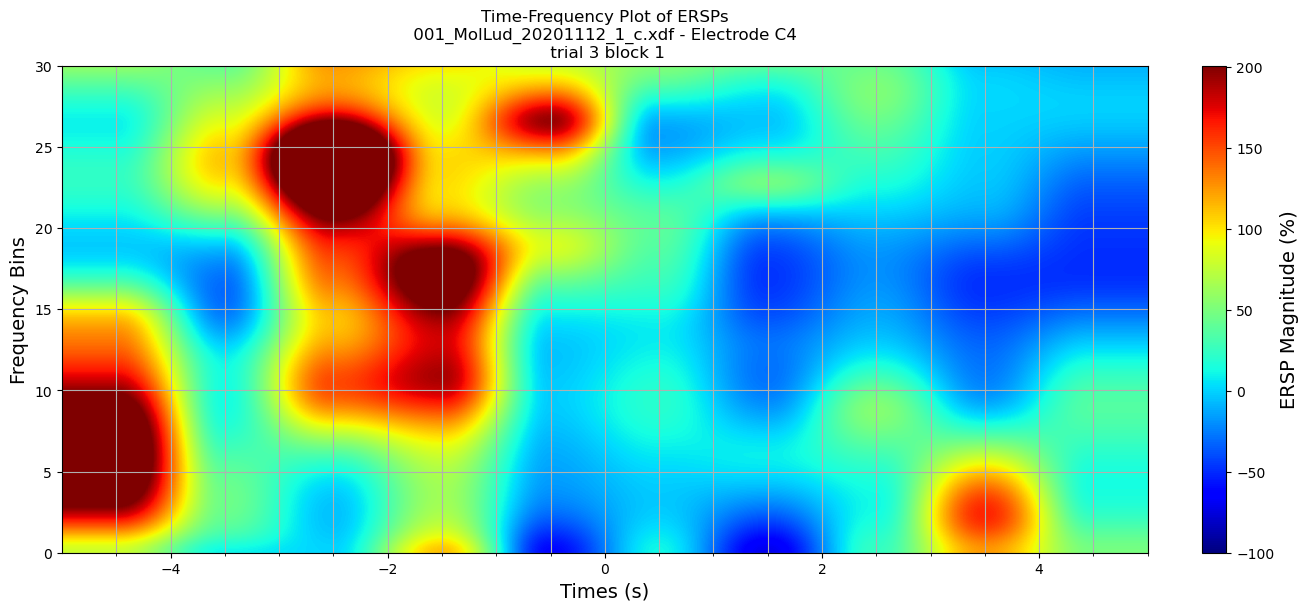

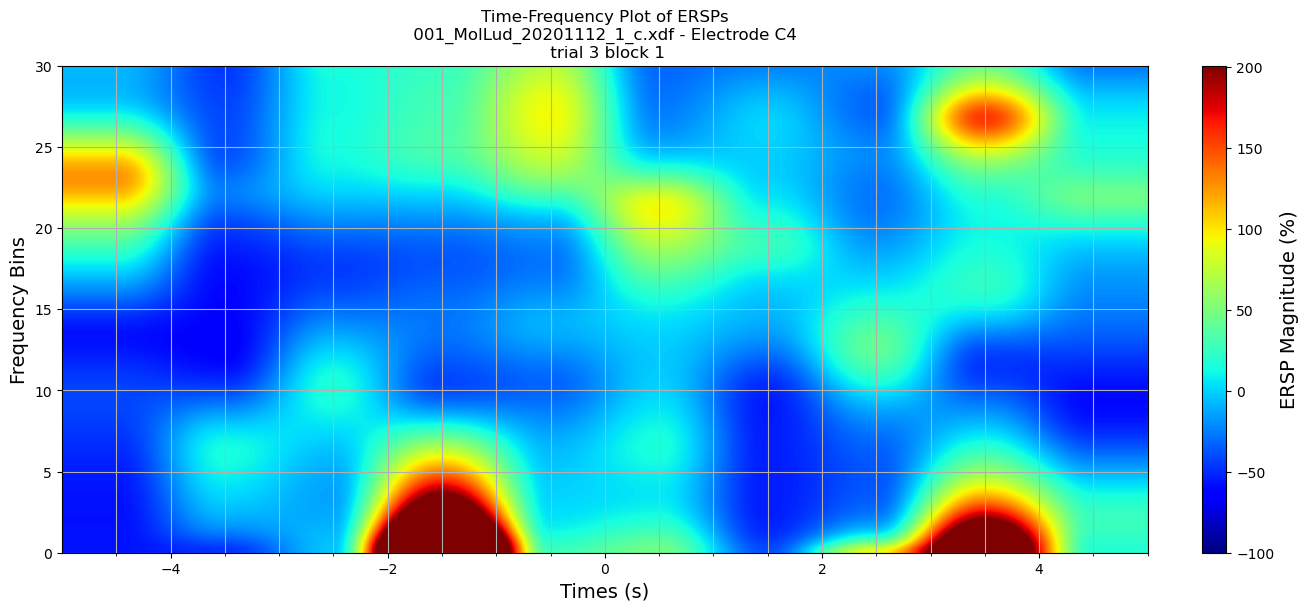

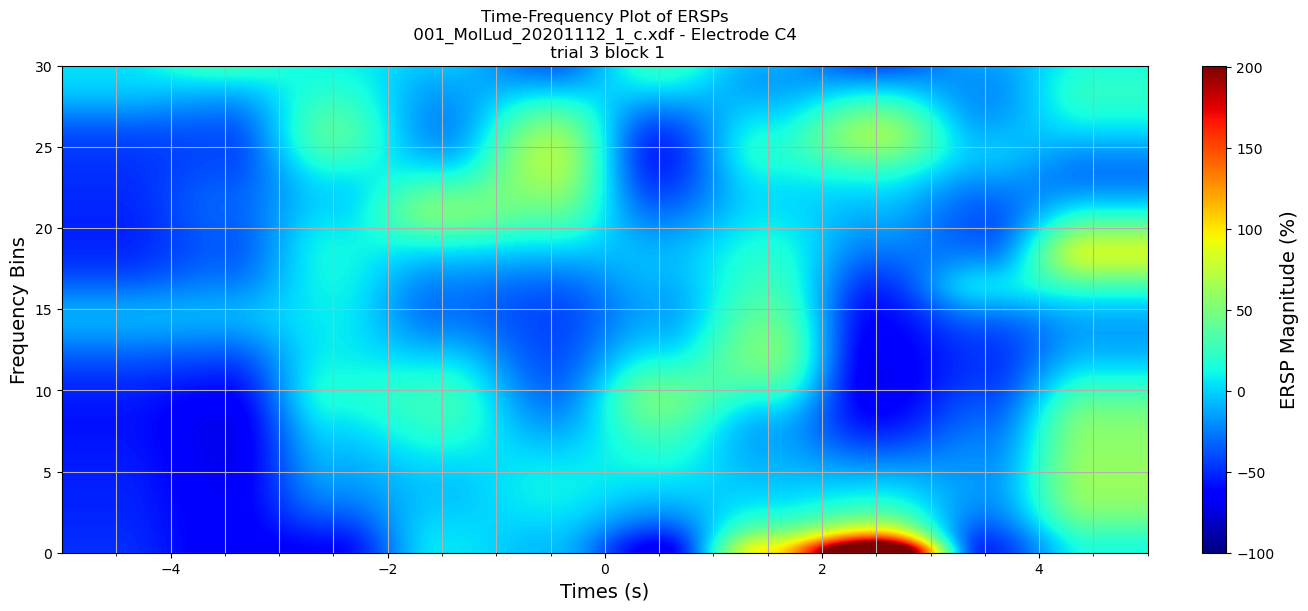

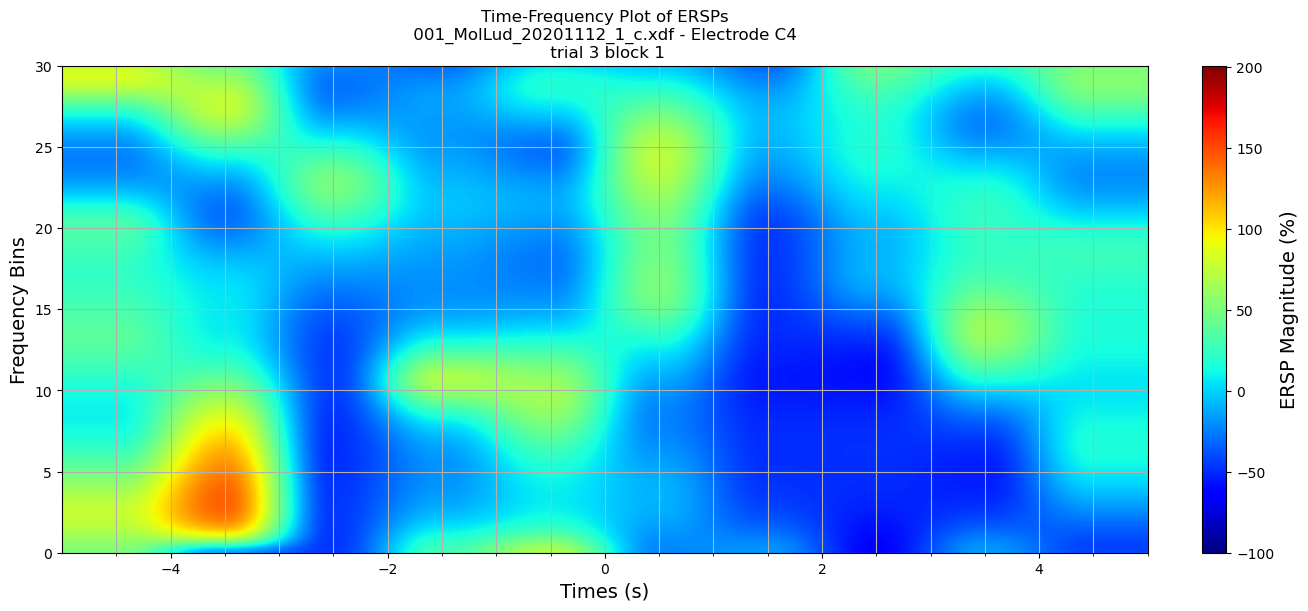

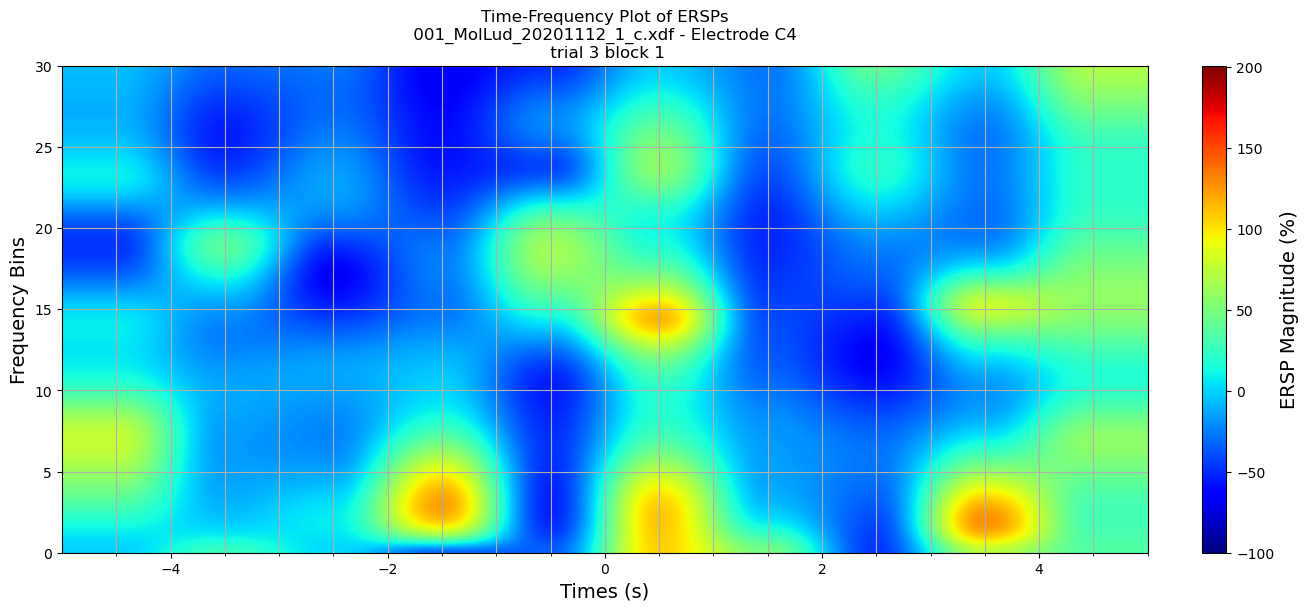

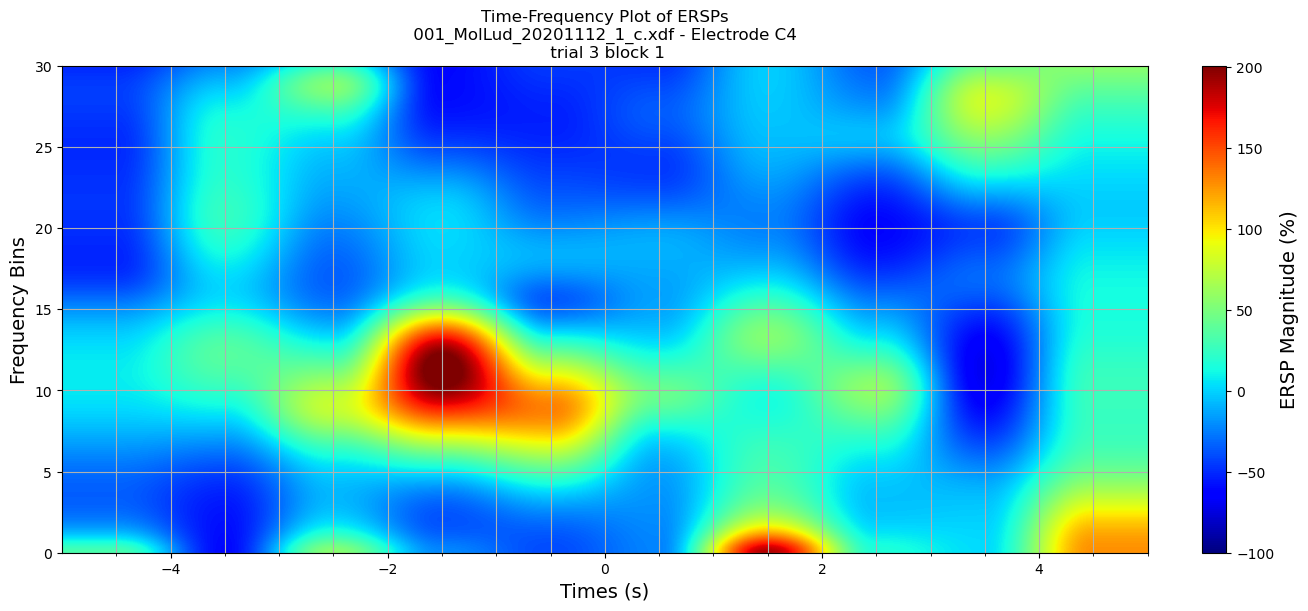

In [ ]:
#V2
from matplotlib.ticker import AutoMinorLocator

for trial in range(len(list_of_transposed_arrays)):
    print("trial num",trial)
    # Create the time-frequency plot
    plt.figure(figsize=(13, 6))

    # Use extent to specify the data limits for the axes
    """plt.imshow(eren,extent=(-6,6,freqswiss[0],freqswiss[-1]),
            aspect='auto', cmap='viridis', origin='lower')"""
    plt.imshow(list_of_transposed_arrays[trial][:,:,4],extent=(epoch_param[0],epoch_param[1],freqswiss[0],freqswiss[-1]),vmin=np.min(eren),vmax=np.max(eren),
            aspect='auto', cmap='jet', origin='lower')
    plt.ylim(0,30)
    plt.xlim(epoch_param[0],epoch_param[1])

    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator())

    plt.grid(visible=True,which="both",axis="both")
    plt.colorbar(label='ERSP Magnitude (%)')
    plt.title(f'Time-Frequency Plot of ERSPs\n {xdf_input_filename} - Electrode C4 \n trial 3 block 1')
    plt.xlabel('Times (s)')
    plt.ylabel('Frequency Bins')

Text(0, 0.5, 'Frequency Bins')

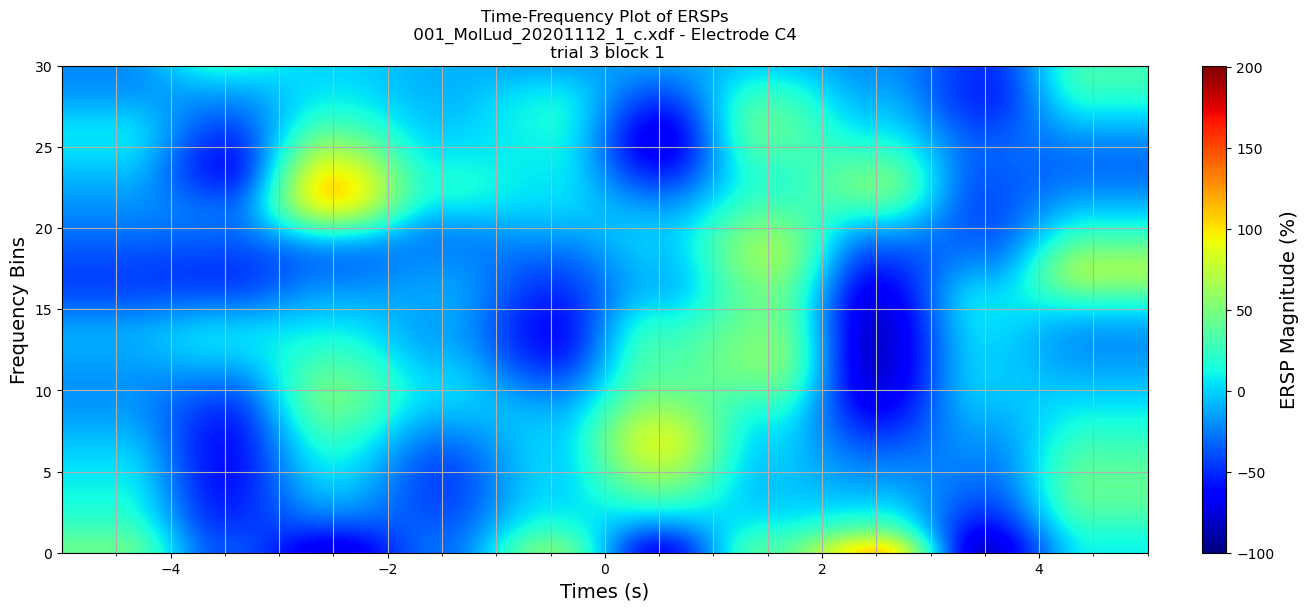

In [ ]:
from matplotlib.ticker import AutoMinorLocator

# Create the time-frequency plot
plt.figure(figsize=(13, 6))

# Use extent to specify the data limits for the axes
"""plt.imshow(eren,extent=(-6,6,freqswiss[0],freqswiss[-1]),
           aspect='auto', cmap='viridis', origin='lower')"""
plt.imshow(eren,extent=(epoch_param[0],epoch_param[1],freqswiss[0],freqswiss[-1]),vmin=np.min(eren),vmax=np.max(eren),
           aspect='auto', cmap='jet', origin='lower')
plt.ylim(0,30)
plt.xlim(epoch_param[0],epoch_param[1])

ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())

plt.grid(visible=True,which="both",axis="both")
plt.colorbar(label='ERSP Magnitude (%)')
plt.title(f'Time-Frequency Plot of ERSPs\n {xdf_input_filename} - Electrode C4 \n trial 3 block 1')
plt.xlabel('Times (s)')
plt.ylabel('Frequency Bins')